##Daily Challenge : Analysis of Airplane Crashes and Fatalities

Data Import and Cleaning

In [434]:
import pandas as pd

airplanes_crashes_df = pd.read_csv('airplanes_crashes.csv', encoding='latin-1')
airplanes_crashes_df.head(20)

,Date,Time,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909,NaN,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912,6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913,NaN,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,3/5/1915,1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,9/3/1915,15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,7/28/1916,NaN,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,9/24/1916,1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


In [435]:
airplanes_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   4998 non-null   object 
 1   Time                   3486 non-null   object 
 2   Location               4994 non-null   object 
 3   Operator               4988 non-null   object 
 4   Flight #               1329 non-null   object 
 5   Route                  4221 non-null   object 
 6   AC Type                4983 non-null   object 
 7   Registration           4724 non-null   object 
 8   cn/ln                  4330 non-null   object 
 9   Aboard                 4980 non-null   float64
 10  Aboard Passangers      4769 non-null   float64
 11  Aboard Crew            4772 non-null   float64
 12  Fatalities             4990 non-null   float64
 13  Fatalities Passangers  4756 non-null   float64
 14  Fatalities Crew        4757 non-null   float64
 15  Grou

Filling NaN Time with mode, concatening Date & Time, droping Time Columns

In [436]:
mode_time = airplanes_crashes_df['Time'].mode()[0]
airplanes_crashes_df['Time'] = airplanes_crashes_df['Time'].fillna(mode_time)
airplanes_crashes_df['Date'] = airplanes_crashes_df['Date'] + ' ' + airplanes_crashes_df['Time']
airplanes_crashes_df.drop('Time', axis=1, inplace=True)
airplanes_crashes_df.head(10)

,Date,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,9/17/1908 17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,9/7/1909 15:00,"Juvisy-sur-Orge, France",NaN,NaN,Air show,Wright Byplane,SC1,NaN,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,7/12/1912 6:30,"Atlantic City, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,8/6/1913 15:00,"Victoria, British Columbia, Canada",Private,NaN,NaN,Curtiss seaplane,NaN,NaN,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,9/9/1913 18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,NaN,NaN,14.0,NaN,NaN,0.0,The airship flew into a thunderstorm and encou...
5,10/17/1913 10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,NaN,NaN,30.0,NaN,NaN,0.0,Hydrogen gas which was being vented was sucked...
6,3/5/1915 1:00,"Tienen, Belgium",Military - German Navy,NaN,NaN,Zeppelin L-8 (airship),NaN,NaN,41.0,NaN,NaN,21.0,NaN,NaN,0.0,Crashed into trees while attempting to land af...
7,9/3/1915 15:20,"Off Cuxhaven, Germany",Military - German Navy,NaN,NaN,Zeppelin L-10 (airship),NaN,NaN,19.0,NaN,NaN,19.0,NaN,NaN,0.0,"Exploded and burned near Neuwerk Island, when..."
8,7/28/1916 15:00,"Near Jambol, Bulgeria",Military - German Army,NaN,NaN,Schutte-Lanz S-L-10 (airship),NaN,NaN,20.0,NaN,NaN,20.0,NaN,NaN,0.0,"Crashed near the Black Sea, cause unknown."
9,9/24/1916 1:00,"Billericay, England",Military - German Navy,NaN,NaN,Zeppelin L-32 (airship),NaN,NaN,22.0,NaN,NaN,22.0,NaN,NaN,0.0,Shot down by British aircraft crashing in flames.


handlig wrong time by droping the entire line, and converting Date columns to datetime format

In [446]:
accurate_date1 = airplanes_crashes_df[airplanes_crashes_df['Date'] == '9/2/1928 91:05:00']
accurate_date2 = airplanes_crashes_df[airplanes_crashes_df['Date'] == '1/17/1965 90:00:00']
accurate_date3 = airplanes_crashes_df[airplanes_crashes_df['Date'] == '3/15/1981 24:05:00']

invalid_times = [accurate_date1, accurate_date2, accurate_date3]

for invalid_time in invalid_times:
    airplanes_crashes_df.drop(invalid_time.index, inplace=True)

airplanes_crashes_df['Date'] = pd.to_datetime(airplanes_crashes_df['Date'])

airplanes_crashes_df.head()

,Date,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17 17:18:00,Virginia,Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07 15:00:00,France,Unknown,Unknown,Air show,Wright Byplane,SC1,Unknown,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12 06:30:00,New Jersey,Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,Unknown,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06 15:00:00,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,Unknown,20.0,12.0,4.0,14.0,8.0,3.0,0.0,The airship flew into a thunderstorm and encou...


In [447]:
airplanes_crashes_df['Location'] = airplanes_crashes_df['Location'].str.split(',').str[-1]
airplanes_crashes_df


,Date,Location,Operator,Flight #,Route,AC Type,Registration,cn/ln,Aboard,Aboard Passangers,Aboard Crew,Fatalities,Fatalities Passangers,Fatalities Crew,Ground,Summary
0,1908-09-17 17:18:00,Virginia,Military - U.S. Army,Unknown,Demonstration,Wright Flyer III,Unknown,1,2.0,1.0,1.0,1.0,1.0,0.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,1909-09-07 15:00:00,France,Unknown,Unknown,Air show,Wright Byplane,SC1,Unknown,1.0,0.0,1.0,1.0,0.0,0.0,0.0,Eugene Lefebvre was the first pilot to ever be...
2,1912-07-12 06:30:00,New Jersey,Military - U.S. Navy,Unknown,Test flight,Dirigible,Unknown,Unknown,5.0,0.0,5.0,5.0,0.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
3,1913-08-06 15:00:00,Canada,Private,Unknown,Unknown,Curtiss seaplane,Unknown,Unknown,1.0,0.0,1.0,1.0,0.0,1.0,0.0,The first fatal airplane accident in Canada oc...
4,1913-09-09 18:30:00,Over the North Sea,Military - German Navy,Unknown,Unknown,Zeppelin L-1 (airship),Unknown,Unknown,20.0,12.0,4.0,14.0,8.0,3.0,0.0,The airship flew into a thunderstorm and encou...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4993,2022-11-21 10:15:00,Colombia,AeroPaca SAS,Unknown,Medellín - Pizarro,Piper PA-31-350 Navajo Chieftain,HK-5121,31-7652004,8.0,6.0,2.0,8.0,6.0,2.0,0.0,The plane was chartered to carry a team of six...
4994,2023-01-15 10:50:00,Nepal,Yeti Airlines,YT691,Kathmandu - Pokhara,ATR 72-500-72-212-A,9NANC,754,72.0,68.0,4.0,72.0,68.0,4.0,0.0,"Before approach, the pilot requested a change ..."
4995,2023-09-16 15:00:00,Brazil,Manaus Aerotaxi,Unknown,Unknown,Embraer EMB-110P1 Bandeirante,PT-SOG,110490,14.0,12.0,2.0,14.0,12.0,2.0,0.0,The air taxi crashed in heavy rain while attem...
4996,2023-10-29 06:30:00,Brazil,ART Taxi Aero,Unknown,Rio Branco - Envira,Cessna 208B Grand Caravan,PT-MEE,208B0344,12.0,10.0,2.0,12.0,10.0,2.0,0.0,The air taxi crashed into a heavy wooded area ...


handling NaN value by Unknown

In [439]:
for column in airplanes_crashes_df.columns:
    if airplanes_crashes_df[column].dtype == 'object':
        airplanes_crashes_df[column] = airplanes_crashes_df[column].fillna('Unknown')
airplanes_crashes_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4995 non-null   datetime64[ns]
 1   Location               4995 non-null   object        
 2   Operator               4995 non-null   object        
 3   Flight #               4995 non-null   object        
 4   Route                  4995 non-null   object        
 5   AC Type                4995 non-null   object        
 6   Registration           4995 non-null   object        
 7   cn/ln                  4995 non-null   object        
 8   Aboard                 4977 non-null   float64       
 9   Aboard Passangers      4767 non-null   float64       
 10  Aboard Crew            4770 non-null   float64       
 11  Fatalities             4987 non-null   float64       
 12  Fatalities Passangers  4754 non-null   float64       
 13  Fataliti

In [440]:
nan_values = airplanes_crashes_df.isna().sum()
print(nan_values)


Date                       0
Location                   0
Operator                   0
Flight #                   0
Route                      0
AC Type                    0
Registration               0
cn/ln                      0
Aboard                    18
Aboard Passangers        228
Aboard Crew              225
Fatalities                 8
Fatalities Passangers    241
Fatalities Crew          240
Ground                    42
Summary                    0
dtype: int64


handling missing value with median value

In [441]:
for column in airplanes_crashes_df.columns:
    if airplanes_crashes_df[column].dtype == 'float64':
        airplanes_crashes_df[column] = airplanes_crashes_df[column].fillna(airplanes_crashes_df[column].median())

airplanes_crashes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4995 entries, 0 to 4997
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   4995 non-null   datetime64[ns]
 1   Location               4995 non-null   object        
 2   Operator               4995 non-null   object        
 3   Flight #               4995 non-null   object        
 4   Route                  4995 non-null   object        
 5   AC Type                4995 non-null   object        
 6   Registration           4995 non-null   object        
 7   cn/ln                  4995 non-null   object        
 8   Aboard                 4995 non-null   float64       
 9   Aboard Passangers      4995 non-null   float64       
 10  Aboard Crew            4995 non-null   float64       
 11  Fatalities             4995 non-null   float64       
 12  Fatalities Passangers  4995 non-null   float64       
 13  Fataliti

Exploratory Data Analysis:

In [442]:
total_crashes = len(airplanes_crashes_df)
total_fatalities = airplanes_crashes_df['Fatalities'].sum()
total_survivors = airplanes_crashes_df['Aboard'].sum() - total_fatalities

print("Total number of crashes:", total_crashes)
print("Total number of fatalities:", total_fatalities)
print("Total number of survivors:", total_survivors)


Total number of crashes: 4995
Total number of fatalities: 111711.0
Total number of survivors: 43894.0


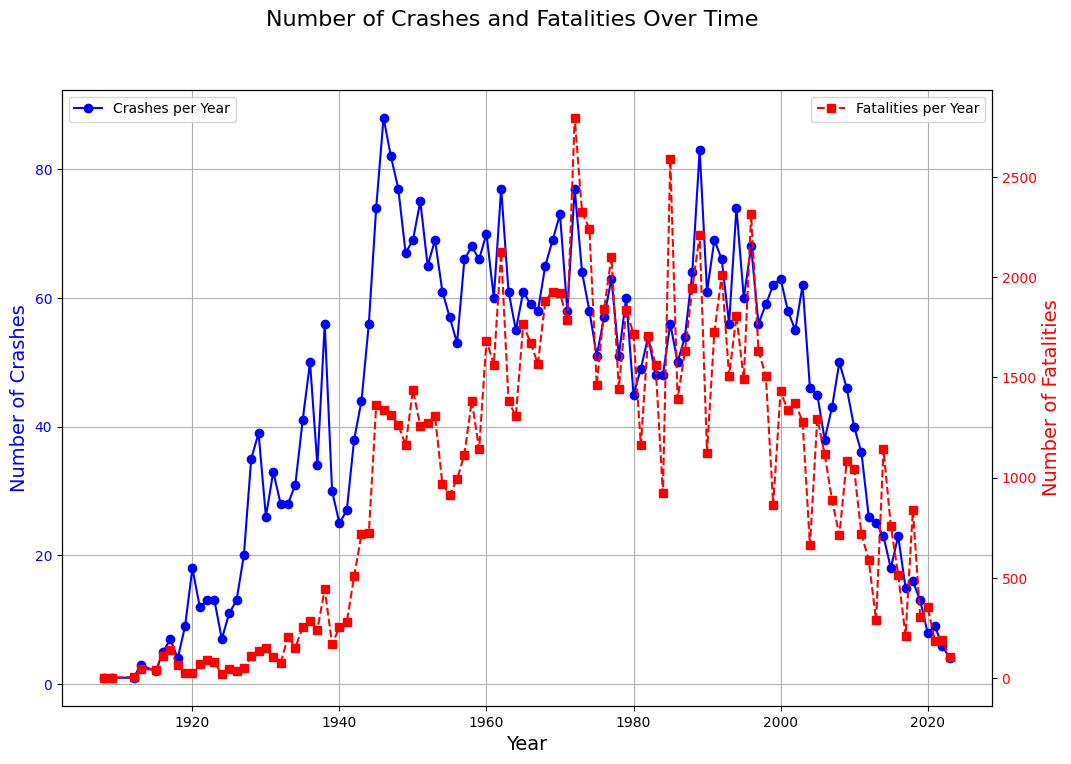

In [443]:
import matplotlib.pyplot as plt

crashes_per_year = airplanes_crashes_df['Date'].dt.year.value_counts().sort_index()
fatalities_per_year = airplanes_crashes_df.groupby(airplanes_crashes_df['Date'].dt.year)['Fatalities'].sum()

# Create a DataFrame for crashes per year
crashes_per_year_df = crashes_per_year.reset_index()
crashes_per_year_df.columns = ['Year', 'Crashes']

fig, ax1 = plt.subplots(figsize=(12, 8))

ax1.plot(crashes_per_year.index, crashes_per_year.values, marker='o', linestyle='-', color='b', label="Crashes per Year")
ax1.set_xlabel("Year", fontsize=14)
ax1.set_ylabel("Number of Crashes", color='b', fontsize=14)
ax1.tick_params(axis='y', labelcolor='b')

# Create a secondary y-axis (right) for fatalities
ax2 = ax1.twinx()
ax2.plot(fatalities_per_year.index, fatalities_per_year.values, marker='s', linestyle='--', color='r', label="Fatalities per Year")
ax2.set_ylabel("Number of Fatalities", color='r', fontsize=14)
ax2.tick_params(axis='y', labelcolor='r')

# Add a title and grid
fig.suptitle("Number of Crashes and Fatalities Over Time", fontsize=16)
ax1.grid()

# Add legends for both axes
ax1.legend(loc="upper left")
ax2.legend(loc="upper right")

# Show the plot
plt.show()

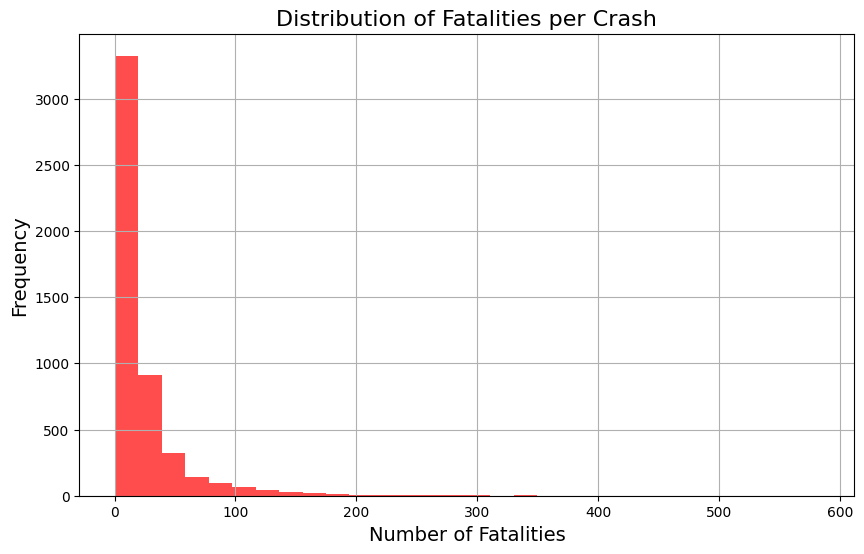

In [448]:
# fatalities histogram
plt.figure(figsize=(10, 6))
plt.hist(airplanes_crashes_df['Fatalities'].dropna(), bins=30, color='r', alpha=0.7)
plt.title("Distribution of Fatalities per Crash", fontsize=16)
plt.xlabel("Number of Fatalities", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid()
plt.show()

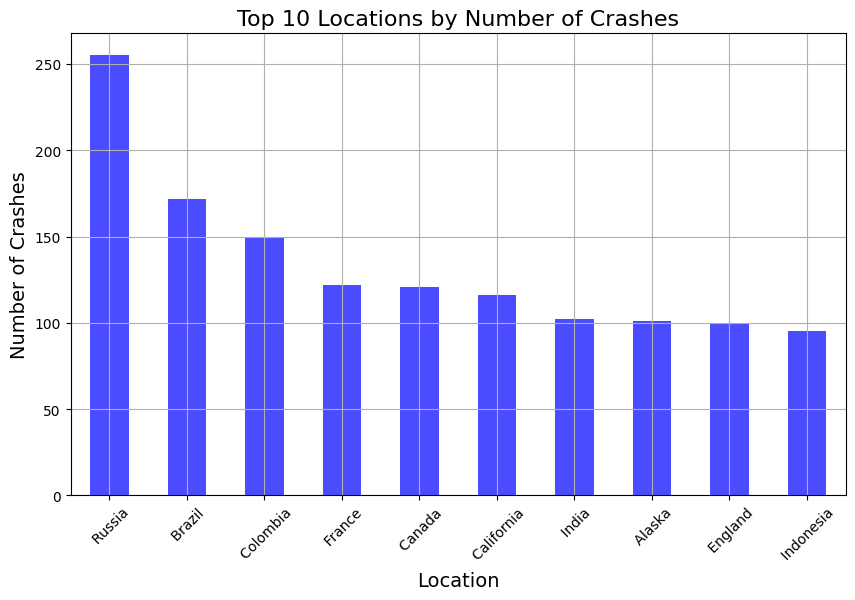

In [449]:
# Crashs by location
crashes_by_location = airplanes_crashes_df['Location'].value_counts().head(10)

# plot chart
plt.figure(figsize=(10, 6))
crashes_by_location.plot(kind='bar', color='b', alpha=0.7)
plt.title("Top 10 Locations by Number of Crashes", fontsize=16)
plt.xlabel("Location", fontsize=14)
plt.ylabel("Number of Crashes", fontsize=14)
plt.xticks(rotation=45)
plt.grid()
plt.show()


Statistical Analysis:

In [461]:
airplanes_crashes_df['Decade'] = (airplanes_crashes_df['Date'].dt.year // 10) * 10



Statistics for Survival Rate:
count    4990.000000
mean       18.225859
std        31.218078
min       -62.500000
25%         0.000000
50%         0.000000
75%        25.000000
max       100.000000
Name: Survival Rate, dtype: float64


In [462]:
fatalities_stats = airplanes_crashes_df['Fatalities'].describe()
print("Statistics for Fatalities:")
print(fatalities_stats)

airplanes_crashes_df['Survival Rate'] = (
    (airplanes_crashes_df['Aboard'] - airplanes_crashes_df['Fatalities']) / airplanes_crashes_df['Aboard']
) * 100

# Statistiques descriptives pour le taux de survie
survival_rate_stats = airplanes_crashes_df['Survival Rate'].describe()
print("\nStatistics for Survival Rate:")
print(survival_rate_stats)


Statistics for Fatalities:
count    4995.000000
mean       22.364565
std        35.045074
min         0.000000
25%         4.000000
50%        11.000000
75%        25.000000
max       583.000000
Name: Fatalities, dtype: float64

Statistics for Survival Rate:
count    4990.000000
mean       18.225859
std        31.218078
min       -62.500000
25%         0.000000
50%         0.000000
75%        25.000000
max       100.000000
Name: Survival Rate, dtype: float64


In [459]:
from scipy.stats import ttest_ind

# Decade to compare
fatalities_1940s = airplanes_crashes_df[airplanes_crashes_df['Decade'] == 1940]['Fatalities']
fatalities_1950s = airplanes_crashes_df[airplanes_crashes_df['Decade'] == 1950]['Fatalities']

# t-test
t_stat, p_value = ttest_ind(fatalities_1940s, fatalities_1950s)
print("\nT-Test Results between 1940s and 1950s Fatalities:")
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")



T-Test Results between 1940s and 1950s Fatalities:
T-Statistic: -3.2724325891930577, P-Value: 0.001095999533062014


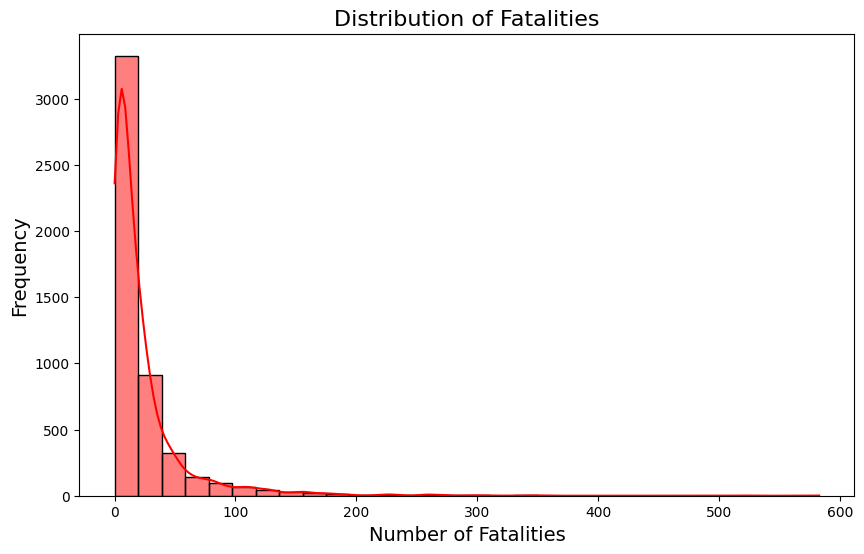

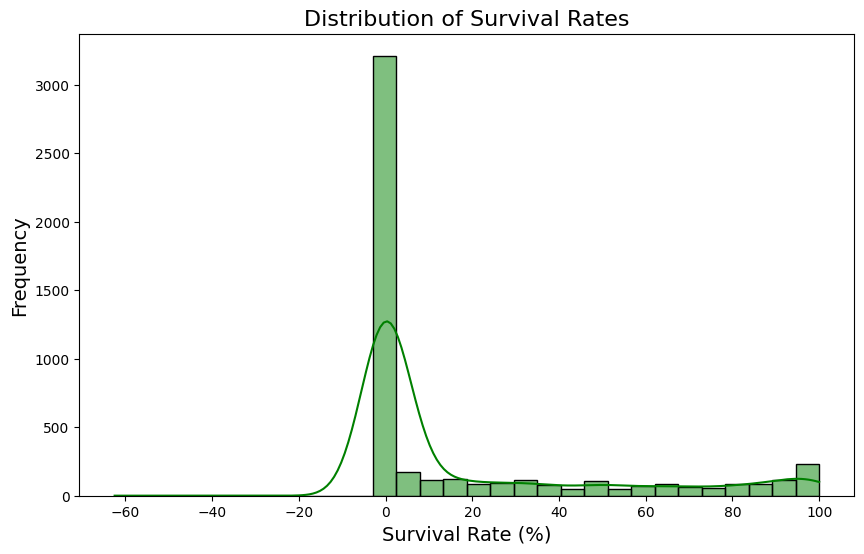

In [463]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des fatalités
plt.figure(figsize=(10, 6))
sns.histplot(airplanes_crashes_df['Fatalities'].dropna(), kde=True, bins=30, color='r')
plt.title("Distribution of Fatalities", fontsize=16)
plt.xlabel("Number of Fatalities", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()

# Distribution du taux de survie
plt.figure(figsize=(10, 6))
sns.histplot(airplanes_crashes_df['Survival Rate'].dropna(), kde=True, bins=30, color='g')
plt.title("Distribution of Survival Rates", fontsize=16)
plt.xlabel("Survival Rate (%)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.show()
